In [80]:
import pandas as pd
import pygal
from IPython.display import display, HTML

In [81]:
df_members = pd.read_csv('data/member.csv')

ag_rep = {'.gov.sg':'', '.edu.sg':'','.com.sg':'','bmsi.':'','scei.':'','.mobi':'','cscollege':'csc','tech':'govtech',
          'iesingapore':'ie','pris':'prisons','defence':'mindef','a-star':'a*star','schools':'moe','sentosa':'sdc'}

orgs = {'OoS':['agc','agd', 'ago','supcourt','statecourts','psd','parl','fjcourts',],'others':['wshi'],'MFA':['mfa'],
        'MLAW':['sla','mlaw','ipos'],'MEWR':['pub','nea','mewr'],
        'MTI': ['a*star','stb','spring','singstat','sdc','mti','jtc','ie','ema','edb',],
        'MOF': ['acra','vital','toteboard','mof','iras','customs','cp2m',],'MSF':['ncss','msf'],
        'MOM':['wsg','mom','cpf',],'MCI':['nlb','mci','imda'],'MOT':['mpa','mot','lta','caas'],
        'MND':['ura','nparks','mnd','hdb','cea','bca','ava'],'MOH':['moh','hsa','hpb'],
        'MOE':['ssg','tp','sp','seab','rp','nyp','np','moe','ite','ial','cpe'],
        'PMO':['pmo','govtech','nrf','mas','csc','csa'],'MCCY':['sport','pgo','pa','nyc','nhb','nac','muis','mccy'],
        'MHA':['spf','score','scdf','prisons','mha','ica','cra','cnb'],'MINDEF':['mindef','dsta']}
df_org = pd.DataFrame(columns=['Parent'])
for key, value in orgs.items():
    for v in value:
        df_org.loc[v.upper()] = key
df_members['Agency'].replace(ag_rep, regex=True,inplace=True)
df_members['Agency'] = df_members['Agency'].str.upper()

df_members = pd.merge(df_members,df_org,how='left',left_on='Agency',right_index=True)

In [121]:
df_member_stats = df_members.pivot_table(columns='Agency',aggfunc='count').transpose()
df_member_stats = df_member_stats.drop(['Parent','User ID'],axis=1).rename(columns={'Name':'Members'})
df_member_stats = pd.merge(df_member_stats, df_org,how='left',left_index=True,right_index=True)
df_member_stats.pivot_table(columns='Parent',aggfunc='sum')

Parent,MCCY,MCI,MEWR,MFA,MHA,MINDEF,MLAW,MND,MOE,MOF,MOH,MOM,MOT,MSF,MTI,OoS,PMO,others
Members,48,33,48,2,72,61,10,75,194,40,17,78,42,18,78,41,177,2


In [117]:
treemap = pygal.Treemap(print_labels=True,width=1600)
treemap.title = 'Member Treemap'
df_groupings = df_member_stats.groupby('Parent')
for name, group in df_groupings:
    _1 = list()
    for index, row in group.iterrows():
        tmp = dict()
        tmp['label'] = index
        tmp['value'] = row['Members']
        _1.append(tmp)
    treemap.add(name,_1)

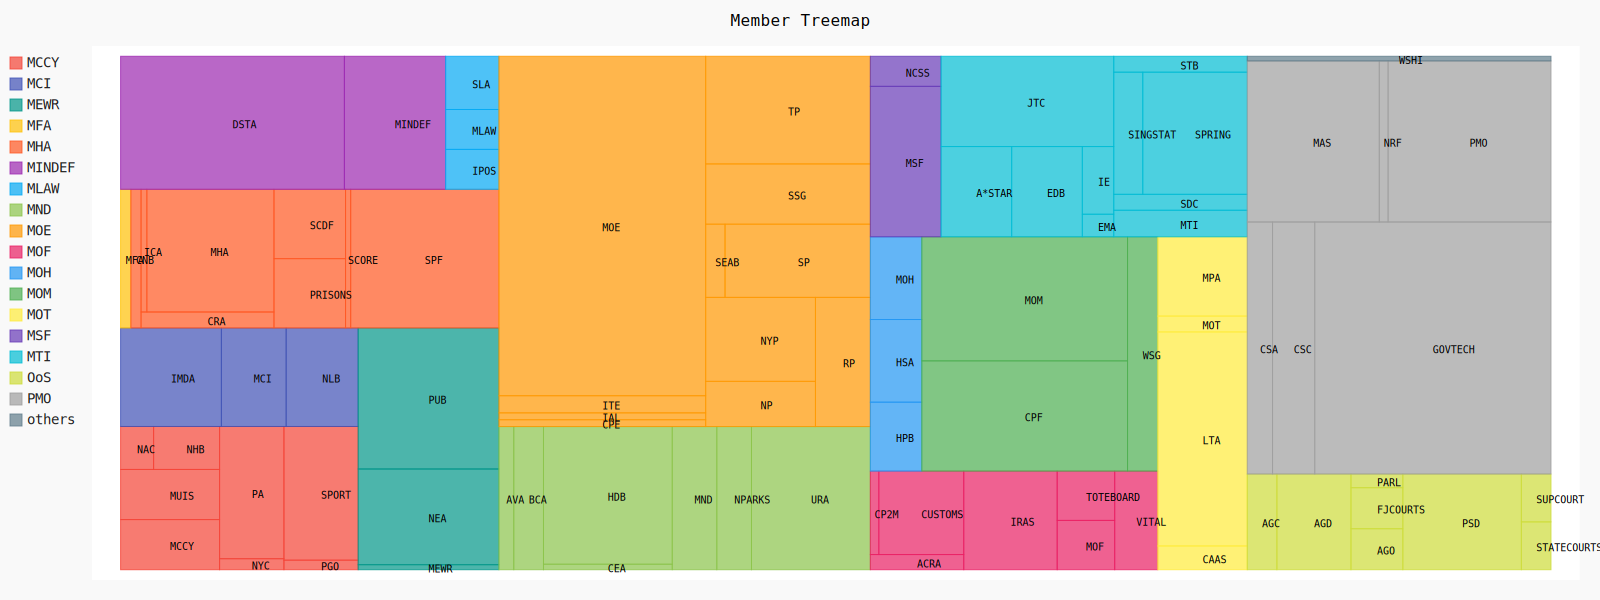

In [122]:
# For quick display in Jupyter, uncomment below
# display(SVG(treemap.render()))
treemap.render_to_file('tree.xml') 